In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")



In [4]:
df = pd.read_csv('Documents/Student Performance Analysis/StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
#Let's change the way the columns are written
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.loc[df.duplicated()] #No duplicates...

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


<Axes: title={'center': 'Most Common Math scores'}>

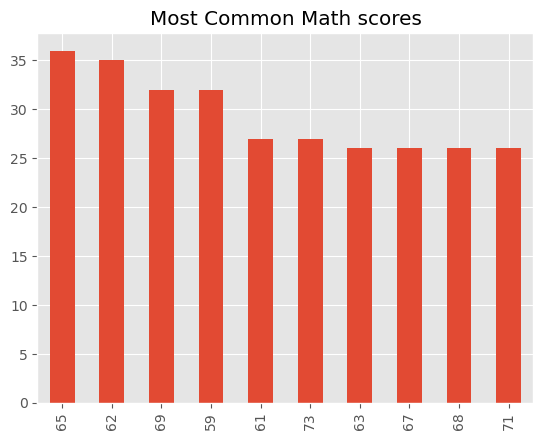

In [24]:
df['math_score'].value_counts().head(10).plot(kind = 'bar', title = 'Most Common Math scores')

<Axes: title={'center': 'Most Common Reading Score'}>

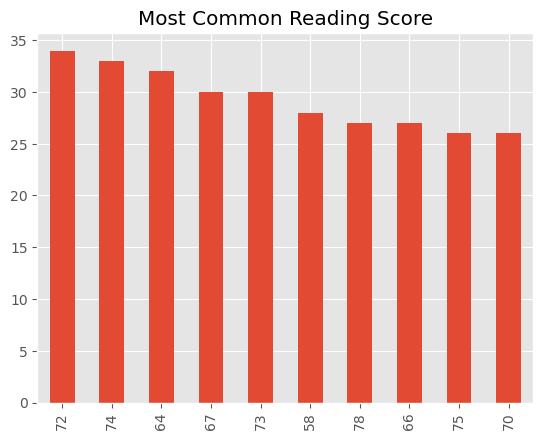

In [23]:
df['reading_score'].value_counts().head(10).plot(kind = 'bar', title = 'Most Common Reading Score')

<Axes: title={'center': 'Most Common Writing Score'}>

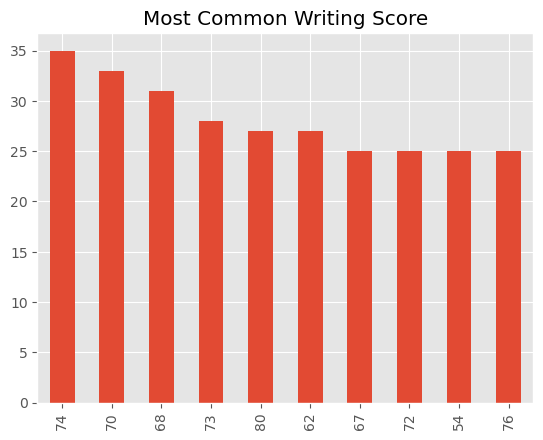

In [27]:
df['writing_score'].value_counts().head(10).plot(kind = 'bar', title = 'Most Common Writing Score')

In [28]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

<Axes: title={'center': 'Parental Level Of Education'}>

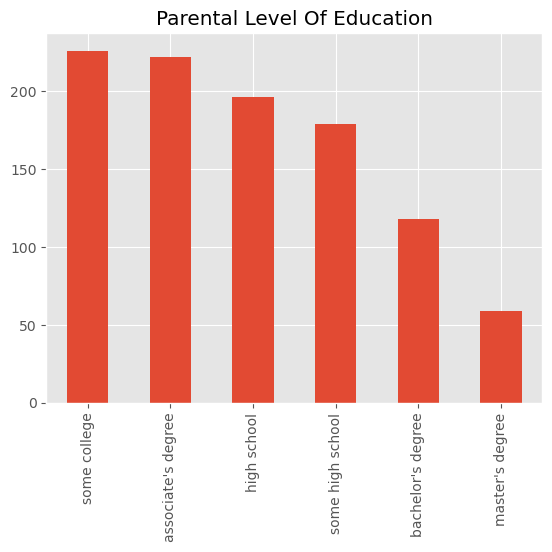

In [30]:
df['parental_level_of_education'].value_counts().plot(kind = 'bar', title = 'Parental Level Of Education')

<Axes: title={'center': 'Test Preparation Course'}>

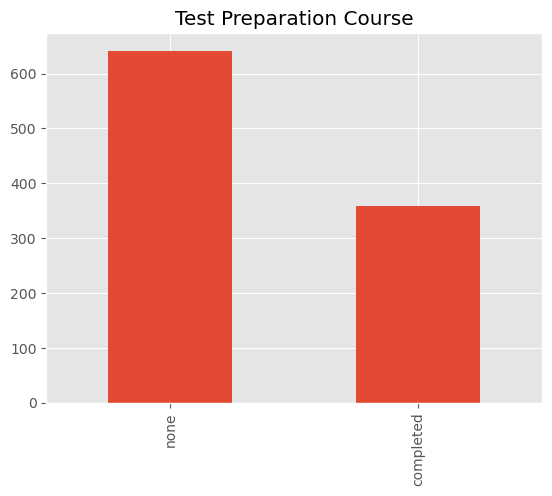

In [31]:
df['test_preparation_course'].value_counts().plot(kind = 'bar', title = 'Test Preparation Course')

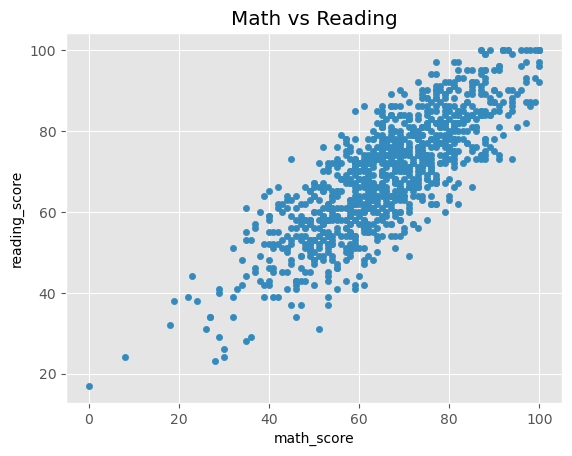

In [33]:
#Feature Relationship

df.plot(kind = 'scatter', x = 'math_score', y = 'reading_score', title = 'Math vs Reading')
plt.show()

In [34]:
df['math_score'].corr(df['reading_score'])

0.8175796636720539

In [35]:
#There's a pretty good correlation(0.81) between the Math score and the reading score. So students who appear to be good at 
#Are also pretty good at reading

In [37]:
corr = df.corr()
corr

C:\Users\MAX01010\AppData\Local\Temp\ipykernel_4444\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


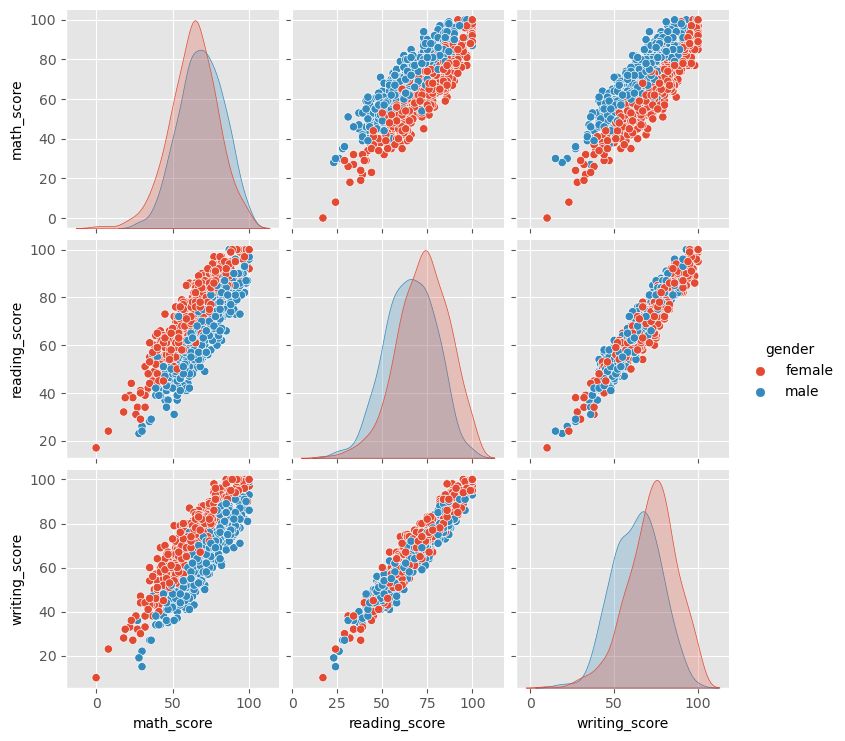

In [39]:
sns.pairplot(df, vars = ['math_score', 'reading_score', 'writing_score'], hue = 'gender')
plt.show()

In [46]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
df['grade'] = np.round((df['math_score'] + df ['reading_score'] + df['writing_score'] ) / 3, 2)

In [58]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


<h1> Let's see if  the preparation course was effective </h1>

<p>For that let's compare the average grade of students who have took the test preparation and those who didn't </p>

In [68]:
df_completed = df.query("test_preparation_course == 'completed'").copy()
df_completed
#Let see the average grade.

avg_completed = df_completed['grade'].mean()
avg_completed

72.66946927374302

In [69]:
df_not_completed = df.query("test_preparation_course == 'none'").copy()
df_not_completed
#Let see the average grade.
avg_not_completed = df_not_completed['grade'].mean()
avg_not_completed

65.03880062305296

<p>As we can see the average grade of students who took the course is about 72, where those who didn't have a score of about 65 </p>
<p> We can now conclude by saying that the <b> The preparation course was effective </b> </p>

In [71]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [79]:
grouped = df.groupby('parental_level_of_education')['grade'].mean()
print(grouped)

parental_level_of_education
associate's degree    69.568964
bachelor's degree     71.923983
high school           63.097194
master's degree       73.598644
some college          68.476106
some high school      65.107654
Name: grade, dtype: float64


In [80]:
df.groupby('lunch')['grade'].mean()

lunch
free/reduced    62.198986
standard        70.837116
Name: grade, dtype: float64

In [81]:
df.groupby('gender')['grade'].mean()

gender
female    69.569498
male      65.837303
Name: grade, dtype: float64

<h3>Which major factors contirbute to test outcomes </h3>
<p> According to my analysis i would say <b> Lunch, Parent Education </b>

<h3> What is the best way to improve the student scores on each test </h3>
<p> Take the <b> Preparation test course </b> </p>